#Projeto de Geo Localização Pt. *1*
##Proposta do Projeto:
Escolha um problema que envolva dados geográficos que você ache interessante de analisar e para este
problema:
1. Colete os dados geográficos e históricos necessários para o desenvolvimento do projeto. Caso sejam
usadas fontes de dados que não são de serviços que fornecem uma API, a fonte destes dados deve ser
mencionada na entrega;
2. Armazene este dados de alguma forma (pode ser tanto em arquivos JSON como no PostgreSQL usando
o PostGIS, ou em um arquivo do DuckDB);
3. Utilize um notebook para fazer visualizações dos dados e exibir quais informações estão armazenadas
e levantar possíveis estudos que podem ser feitos a partir dos dados coletados;
4. A última célula do seu notebook deve conter uma proposta de análise dos dados como resultado das
informações que foram exibidas nas células anteriores

##Integrantes:
- Marcos oliveira de Freitas 
- Luiz Felipe Balaminute     
- Victor Simon Paulo        


##Escolha de Dataset:

Escolhemos o dataset World Happiness Report porque ele mostra como as pessoas em diferentes países avaliam sua própria felicidade. O tema é interessante, atual e permite analisar fatores sociais e econômicos que influenciam a qualidade de vida.

Além disso:

- Os dados são organizados por país, o que facilita a análise geográfica;

- O conjunto tem várias variáveis úteis, como PIB per capita, suporte social e expectativa de vida;

- É um dataset confiável, atualizado e de acesso livre (Kaggle), o que facilita o uso no projeto.

A partir dele, conseguimos criar visualizações e análises que ajudam a entender como a felicidade varia no mundo e o que pode influenciar esses resultados.

Link dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness


In [ ]:
!pip install kagglehub duckdb matplotlib pandas plotly

In [ ]:
import kagglehub
import os

# Baixar o dataset
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Caminho para os arquivos:", path)
print("Arquivos disponíveis:", os.listdir(path))

Caminho para os arquivos: /kaggle/input/world-happiness
Arquivos disponíveis: ['2015.csv', '2017.csv', '2019.csv', '2018.csv', '2016.csv']


In [ ]:
import pandas as pd

# Ajuste conforme o ano
df = pd.read_csv(f"{path}/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
import duckdb

# Conectar/criar o banco de dados DuckDB
con = duckdb.connect(database='felicidade.duckdb', read_only=False)

con.execute("CREATE TABLE IF NOT EXISTS felicidade AS SELECT * FROM df")

con.execute("SELECT * FROM felicidade LIMIT 5").fetchdf()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
from google.colab import files

# Baixar o banco criado
files.download('felicidade.duckdb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

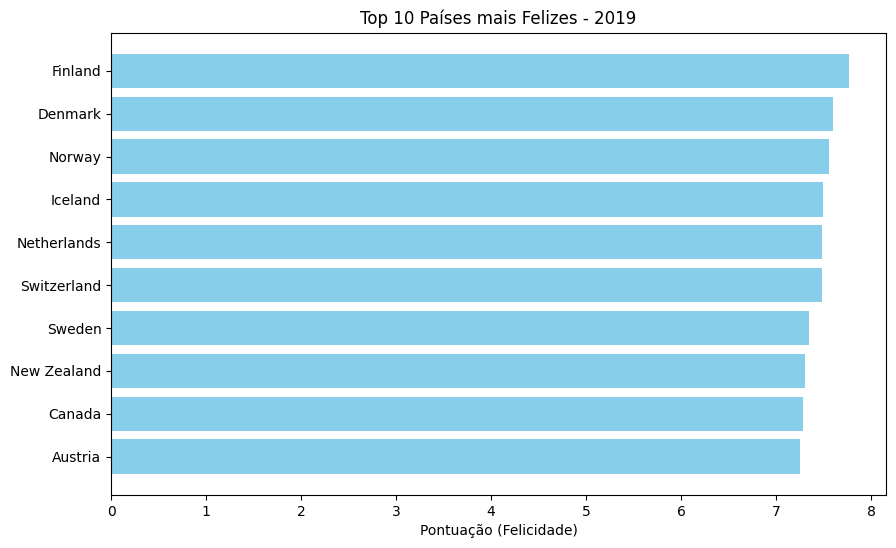

In [ ]:
import matplotlib.pyplot as plt

# DuckDB Top 10
top10 = con.execute("""
    SELECT "Country or region", "Score"
    FROM felicidade
    ORDER BY "Score" DESC
    LIMIT 10
""").fetchdf()

plt.figure(figsize=(10,6))
plt.barh(top10["Country or region"], top10["Score"], color='skyblue')
plt.xlabel("Pontuação (Felicidade)")
plt.title("Top 10 Países mais Felizes - 2019")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import plotly.express as px

# DuckDB
df_mapa = con.execute("""
    SELECT "Country or region", "Score"
    FROM felicidade
""").fetchdf()

# Mapa
fig = px.choropleth(
    df_mapa,
    locations="Country or region",
    locationmode="country names",
    color="Score",
    hover_name="Country or region",
    color_continuous_scale="RdYlGn",
    range_color=[df_mapa["Score"].min(), df_mapa["Score"].max()],
    title="Mapa da Felicidade Global - World Happiness Report 2019"
)
fig.show()

#Analise Futura:

A partir dos dados disponíveis no World Happiness Report, podemos explorar questões como:

- A relação entre a felicidade e o PIB per capita, expectativa de vida, generosidade e corrupção percebida.
- Comparações regionais entre continentes ou grupos econômicos (ex: OCDE vs países em desenvolvimento).
- Evolução histórica (se incluirmos dados de outros anos no futuro).